<a href="https://colab.research.google.com/github/YayanDirjas/Tugas_DeepLearning/blob/main/Klasifikasi_Lampu_Lampu_Lintas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile 

In [ ]:
from zipfile import ZipFile

In [ ]:
!unzip -u "/content/drive/MyDrive/archive.zip" -d "/content/input"

Archive:  /content/drive/MyDrive/archive.zip
  inflating: /content/input/data0.pickle  
  inflating: /content/input/data1.pickle  
  inflating: /content/input/data2.pickle  
  inflating: /content/input/data3.pickle  
  inflating: /content/input/data4.pickle  
  inflating: /content/input/data5.pickle  
  inflating: /content/input/data6.pickle  
  inflating: /content/input/data7.pickle  
  inflating: /content/input/data8.pickle  
  inflating: /content/input/datasets_preparing.py  
  inflating: /content/input/label_names.csv  
  inflating: /content/input/labels.pickle  
  inflating: /content/input/mean_image_gray.pickle  
  inflating: /content/input/mean_image_rgb.pickle  
  inflating: /content/input/std_gray.pickle  
  inflating: /content/input/std_rgb.pickle  
  inflating: /content/input/test.pickle  
  inflating: /content/input/train.pickle  
  inflating: /content/input/valid.pickle  


In [ ]:
import numpy as np 
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
from timeit import default_timer as timer

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler



import os
for dirname, _, filenames in os.walk('/content/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print(os.listdir('/content/input/'))



/content/input/data7.pickle
/content/input/test.pickle
/content/input/data8.pickle
/content/input/data0.pickle
/content/input/data4.pickle
/content/input/label_names.csv
/content/input/data5.pickle
/content/input/data2.pickle
/content/input/data3.pickle
/content/input/mean_image_gray.pickle
/content/input/std_rgb.pickle
/content/input/valid.pickle
/content/input/std_gray.pickle
/content/input/datasets_preparing.py
/content/input/mean_image_rgb.pickle
/content/input/labels.pickle
/content/input/data1.pickle
/content/input/data6.pickle
/content/input/train.pickle
['data7.pickle', 'test.pickle', 'data8.pickle', 'data0.pickle', 'data4.pickle', 'label_names.csv', 'data5.pickle', 'data2.pickle', 'data3.pickle', 'mean_image_gray.pickle', 'std_rgb.pickle', 'valid.pickle', 'std_gray.pickle', 'datasets_preparing.py', 'mean_image_rgb.pickle', 'labels.pickle', 'data1.pickle', 'data6.pickle', 'train.pickle']


In [ ]:

with open('/content/input/data2.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1') 


data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)


data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)


for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)

y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)


(81, 32, 32, 3)


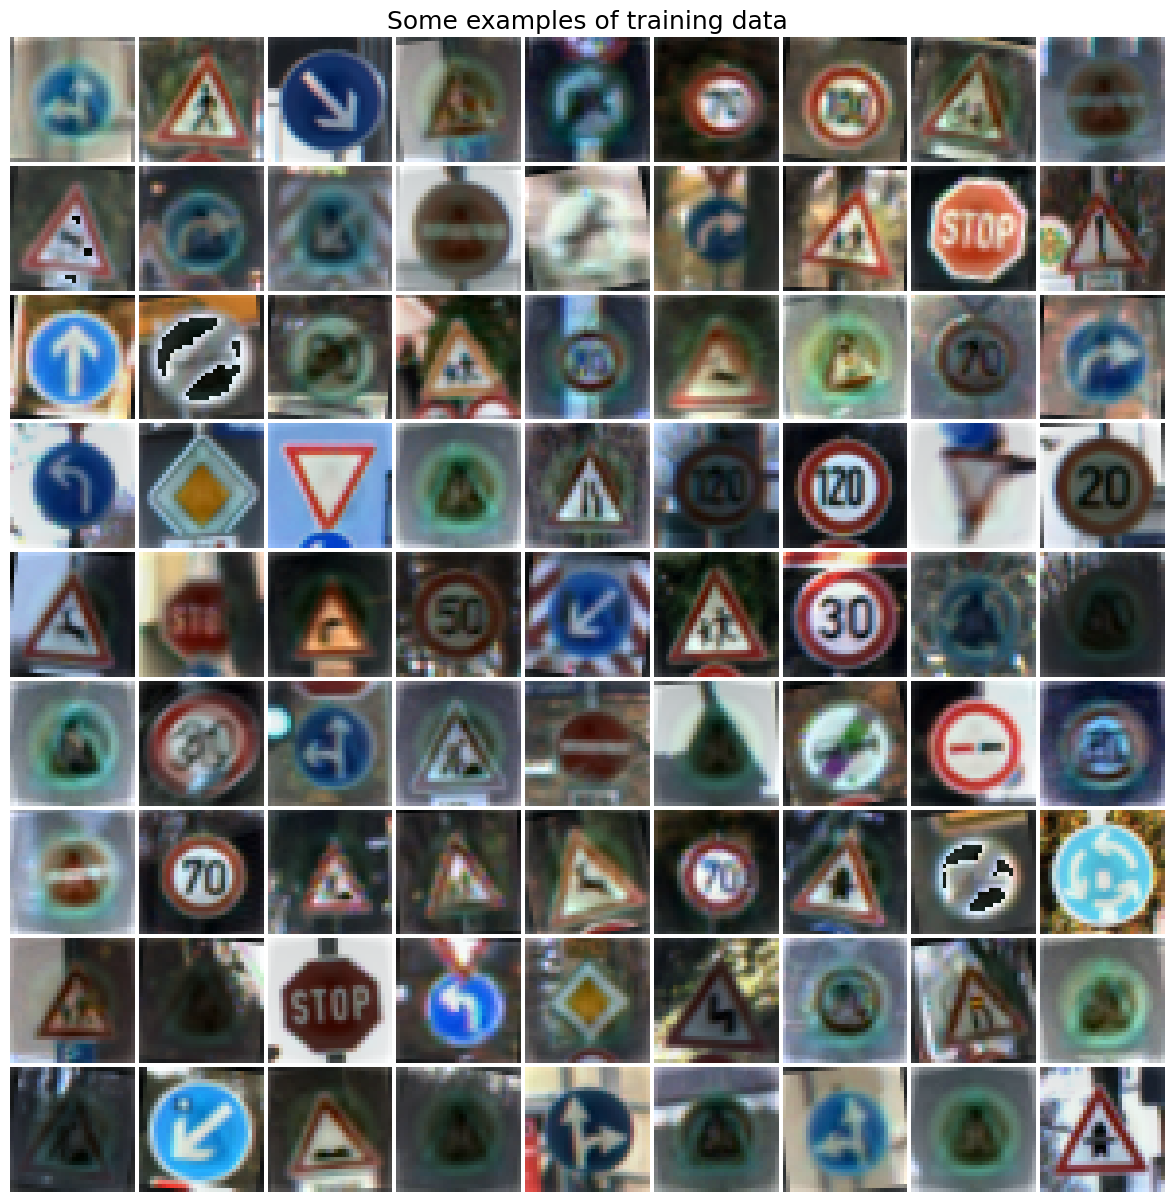

In [ ]:
%matplotlib inline


def convert_to_grid(x_input):
    N, H, W, C = x_input.shape
    grid_size = int(np.ceil(np.sqrt(N)))
    grid_height = H * grid_size + 1 * (grid_size - 1)
    grid_width = W * grid_size + 1 * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C)) + 255
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = x_input[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = 255.0 * (img - low) / (high - low)
                next_idx += 1
            x0 += W + 1
            x1 += W + 1
        y0 += H + 1
        y1 += H + 1

    return grid



examples = data['x_train'][:81, :, :, :]
print(examples.shape)  


fig = plt.figure()
grid = convert_to_grid(examples)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(15, 15)
plt.title('Some examples of training data', fontsize=18)


plt.show()


fig.savefig('training_examples.png')
plt.close()

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 15

h = model.fit(data['x_train'][:10], data['y_train'][:10],
              batch_size=5, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)

Epoch 1/15
2/2 [==============================] - 13s 3s/step - loss: 3.7838 - accuracy: 0.0000e+00 - val_loss: 3.8090 - val_accuracy: 0.0347 - lr: 4.6329e-04
Epoch 2/15
2/2 [==============================] - 2s 2s/step - loss: 3.0849 - accuracy: 0.4000 - val_loss: 3.9901 - val_accuracy: 0.0472 - lr: 4.4013e-04
Epoch 3/15
2/2 [==============================] - 2s 2s/step - loss: 2.5262 - accuracy: 0.7000 - val_loss: 4.4161 - val_accuracy: 0.0458 - lr: 4.1812e-04
Epoch 4/15
2/2 [==============================] - 3s 3s/step - loss: 2.1188 - accuracy: 0.8000 - val_loss: 4.9969 - val_accuracy: 0.0469 - lr: 3.9721e-04
Epoch 5/15
2/2 [==============================] - 2s 2s/step - loss: 1.7918 - accuracy: 0.8000 - val_loss: 5.6068 - val_accuracy: 0.0472 - lr: 3.7735e-04
Epoch 6/15
2/2 [==============================] - 2s 2s/step - loss: 1.5275 - accuracy: 0.8000 - val_loss: 6.1830 - val_accuracy: 0.0456 - lr: 3.5849e-04
Epoch 7/15
2/2 [==============================] - 2s 2s/step - loss: 1.

In [ ]:
print('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
      format(epochs, max(h.history['accuracy']), max(h.history['val_accuracy'])))

Epochs=15, training accuracy=1.00000, validation accuracy=0.04717


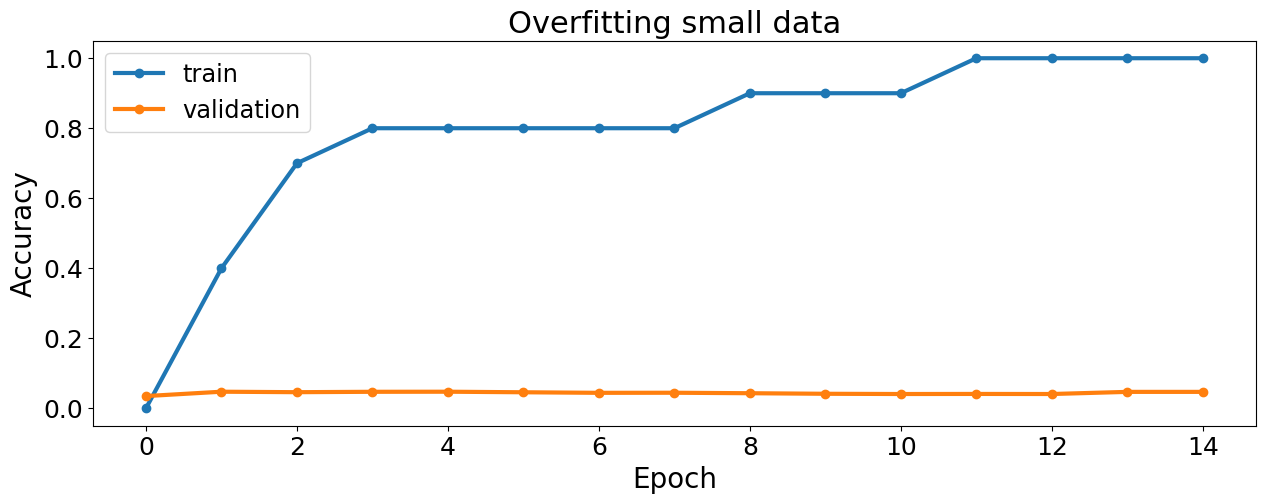

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 5.0) 
plt.rcParams['image.interpolation'] = 'nearest'


fig = plt.figure()
plt.plot(h.history['accuracy'], '-o', linewidth=3.0)
plt.plot(h.history['val_accuracy'], '-o', linewidth=3.0)
plt.title('Overfitting small data', fontsize=22)
plt.legend(['train', 'validation'], loc='upper left', fontsize='xx-large')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)


plt.show()


fig.savefig('overfitting_small_data.png')
plt.close()

In [ ]:
filters = [3, 5, 9, 13, 15, 19, 23, 25, 31]
model = [0] * len(filters)

for i in range(len(model)):
    model[i] = Sequential()
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Flatten())
    model[i].add(Dense(500, activation='relu'))
    model[i].add(Dense(43, activation='softmax'))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 5

h = [0] * len(model)

for i in range(len(h)):
    h[i] = model[i].fit(data['x_train'], data['y_train'],
                        batch_size=5, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer], verbose=0)
    
    print('Model with filters {0:d}x{0:d}, epochs={1:d}, training accuracy={2:.5f}, validation accuracy={3:.5f}'.\
      format(filters[i], epochs, max(h[i].history['accuracy']), max(h[i].history['val_accuracy'])))

Model with filters 3x3, epochs=5, training accuracy=0.98880, validation accuracy=0.88186
Model with filters 5x5, epochs=5, training accuracy=0.98693, validation accuracy=0.86644
Model with filters 9x9, epochs=5, training accuracy=0.98158, validation accuracy=0.83696
Model with filters 13x13, epochs=5, training accuracy=0.97271, validation accuracy=0.84127
Model with filters 15x15, epochs=5, training accuracy=0.97154, validation accuracy=0.84240
Model with filters 19x19, epochs=5, training accuracy=0.96290, validation accuracy=0.82585
Model with filters 23x23, epochs=5, training accuracy=0.95288, validation accuracy=0.85215
Model with filters 25x25, epochs=5, training accuracy=0.94728, validation accuracy=0.82222
Model with filters 31x31, epochs=5, training accuracy=0.93781, validation accuracy=0.80499


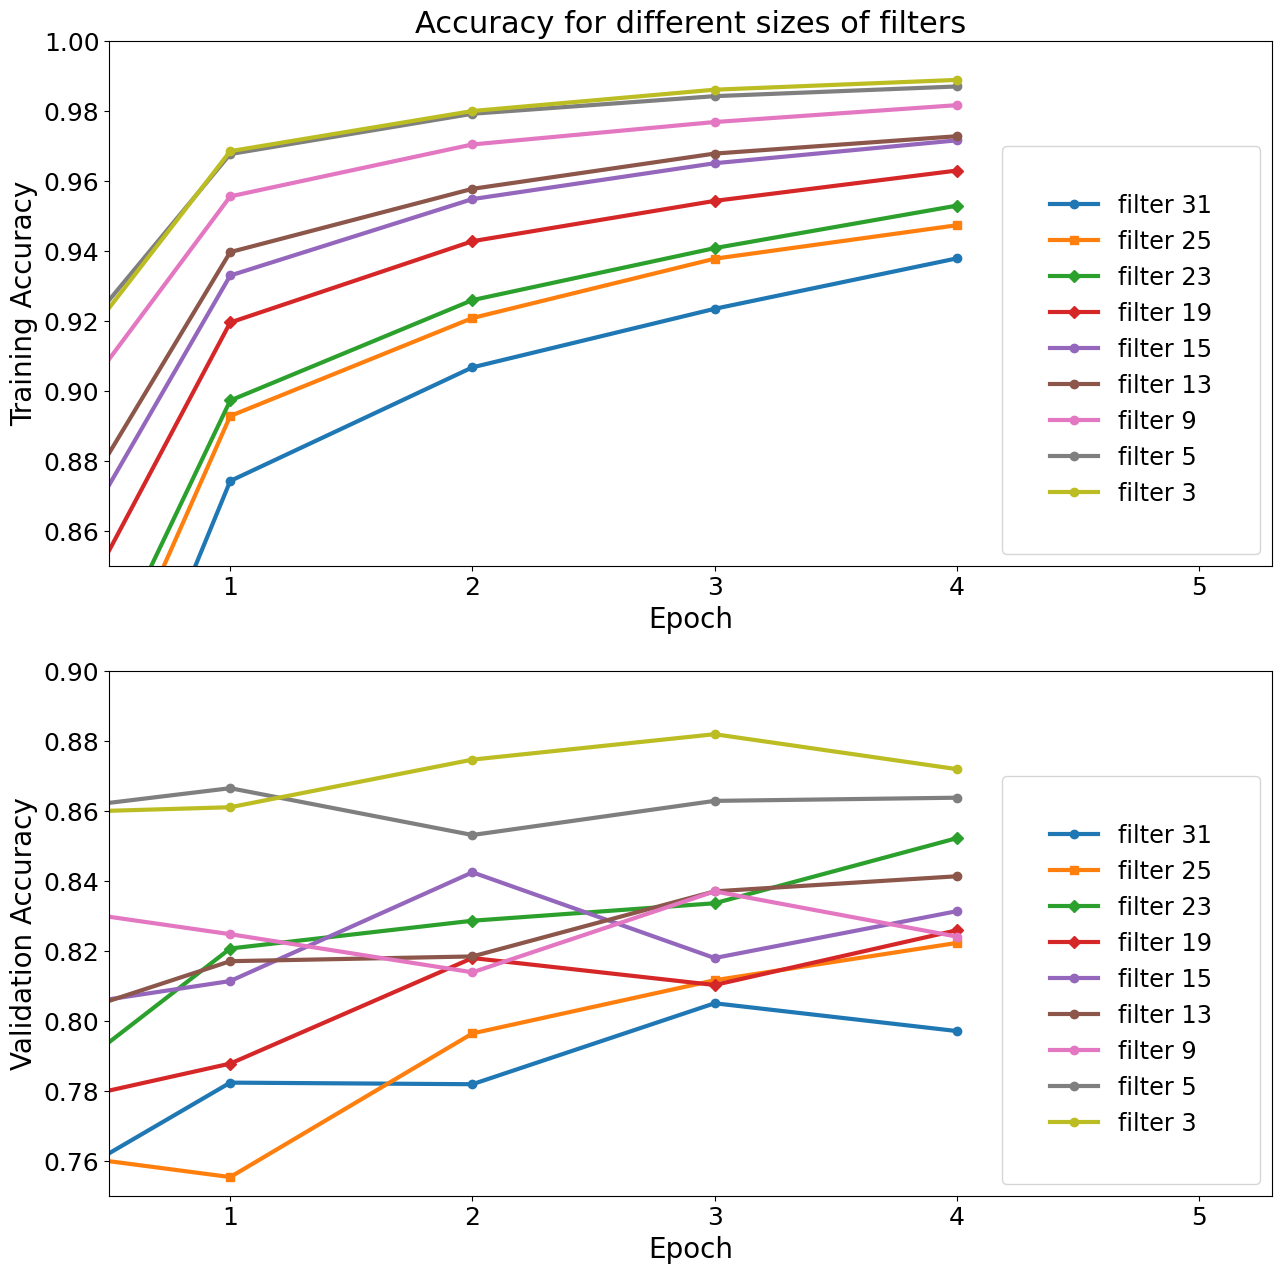

data2 filter 3 training accuracy = 0.98880
data2 filter 5 training accuracy = 0.98693
data2 filter 9 training accuracy = 0.98158
data2 filter 13 training accuracy = 0.97271
data2 filter 15 training accuracy = 0.97154
data2 filter 19 training accuracy = 0.96290
data2 filter 23 training accuracy = 0.95288
data2 filter 25 training accuracy = 0.94728
data2 filter 31 training accuracy = 0.93781

data2 filter 3 validation accuracy = 0.88186
data2 filter 5 validation accuracy = 0.86644
data2 filter 9 validation accuracy = 0.83696
data2 filter 13 validation accuracy = 0.84127
data2 filter 15 validation accuracy = 0.84240
data2 filter 19 validation accuracy = 0.82585
data2 filter 23 validation accuracy = 0.85215
data2 filter 25 validation accuracy = 0.82222
data2 filter 31 validation accuracy = 0.80499


In [21]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 15.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'


fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(h[8].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[7].history['accuracy'], '-s', linewidth=3.0)
plt.plot(h[6].history['accuracy'], '-D', linewidth=3.0)
plt.plot(h[5].history['accuracy'], '-D', linewidth=3.0)
plt.plot(h[4].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[3].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 31', 'filter 25', 'filter 23', 'filter 19', 'filter 15', 'filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Training Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear') 
plt.ylim(0.85, 1.0)
plt.xlim(0.5, 5.3) 
plt.title('Accuracy for different sizes of filters', fontsize=22)
plt.tick_params(labelsize=18)

plt.subplot(2, 1, 2)

plt.plot(h[8].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[7].history['val_accuracy'], '-s', linewidth=3.0)
plt.plot(h[6].history['val_accuracy'], '-D', linewidth=3.0)
plt.plot(h[5].history['val_accuracy'], '-D', linewidth=3.0)
plt.plot(h[4].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[3].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['val_accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 31', 'filter 25', 'filter 23', 'filter 19', 'filter 15', 'filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Validation Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  
plt.ylim(0.75, 0.9)
plt.xlim(0.5, 5.3)
plt.tick_params(labelsize=18)


plt.show()


fig.savefig('models_accuracy.png')
plt.close()



for i in range(len(h)):
    print('data2 filter {0:d} training accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['accuracy'])))

print()

for i in range(len(h)):
    print('data2 filter {0:d} validation accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['val_accuracy'])))

In [22]:
for i in range(len(model)):
    temp = model[i].predict(data['x_test'])
    temp = np.argmax(temp, axis=1)


    temp = np.mean(temp == data['y_test'])
    
    print('data2 filter {0:d} testing accuracy = {1:.5f}'.format(filters[i], temp))

395/395 [==============================] - 1s 2ms/step
data2 filter 3 testing accuracy = 0.87047
395/395 [==============================] - 1s 2ms/step
data2 filter 5 testing accuracy = 0.87268
395/395 [==============================] - 1s 2ms/step
data2 filter 9 testing accuracy = 0.86152
395/395 [==============================] - 1s 2ms/step
data2 filter 13 testing accuracy = 0.85590
395/395 [==============================] - 1s 2ms/step
data2 filter 15 testing accuracy = 0.84877
395/395 [==============================] - 1s 3ms/step
data2 filter 19 testing accuracy = 0.83935
395/395 [==============================] - 1s 2ms/step
data2 filter 23 testing accuracy = 0.83975
395/395 [==============================] - 1s 2ms/step
data2 filter 25 testing accuracy = 0.82478
395/395 [==============================] - 1s 2ms/step
data2 filter 31 testing accuracy = 0.81576


In [23]:
for i in range(len(model)):
    start = timer()
    temp = model[i].predict(data['x_test'][:1, :, :, :])
    end = timer()
    
    print('data2 filter {0:d} classification time = {1:.5f}'.format(filters[i], end - start))

1/1 [==============================] - 0s 79ms/step
data2 filter 3 classification time = 0.13907
1/1 [==============================] - 0s 56ms/step
data2 filter 5 classification time = 0.15605
1/1 [==============================] - 0s 53ms/step
data2 filter 9 classification time = 0.10948
1/1 [==============================] - 0s 44ms/step
data2 filter 13 classification time = 0.09780
1/1 [==============================] - 0s 52ms/step
data2 filter 15 classification time = 0.10065
1/1 [==============================] - 0s 46ms/step
data2 filter 19 classification time = 0.09482
1/1 [==============================] - 0s 49ms/step
data2 filter 23 classification time = 0.10389
1/1 [==============================] - 0s 48ms/step
data2 filter 25 classification time = 0.10026
1/1 [==============================] - 0s 56ms/step
data2 filter 31 classification time = 0.10773


(3, 3, 3, 32)
(32, 3, 3, 3)


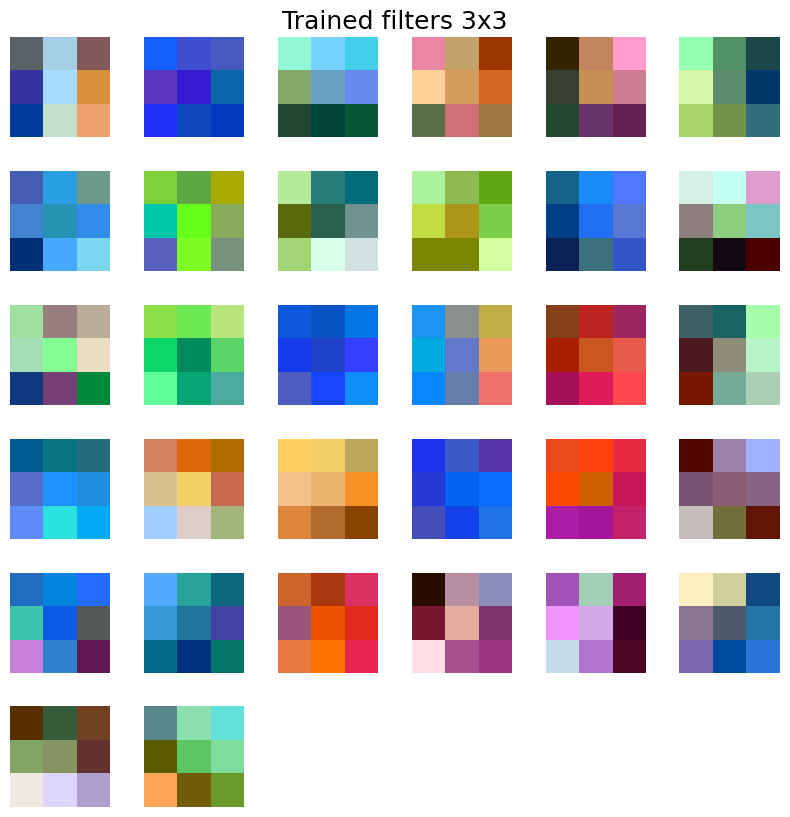

(5, 5, 3, 32)
(32, 5, 5, 3)


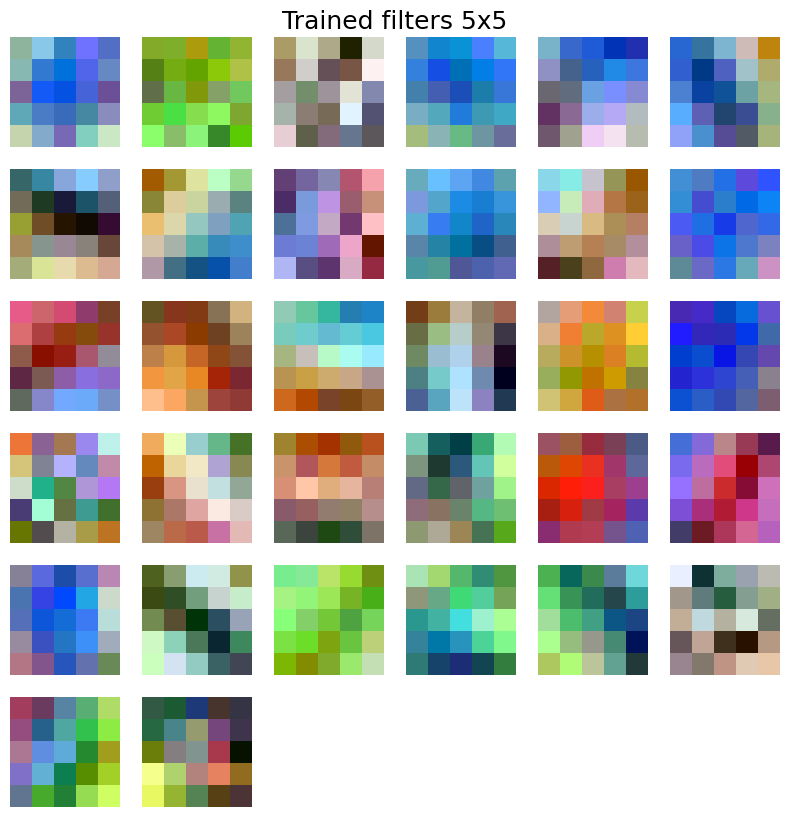

(9, 9, 3, 32)
(32, 9, 9, 3)


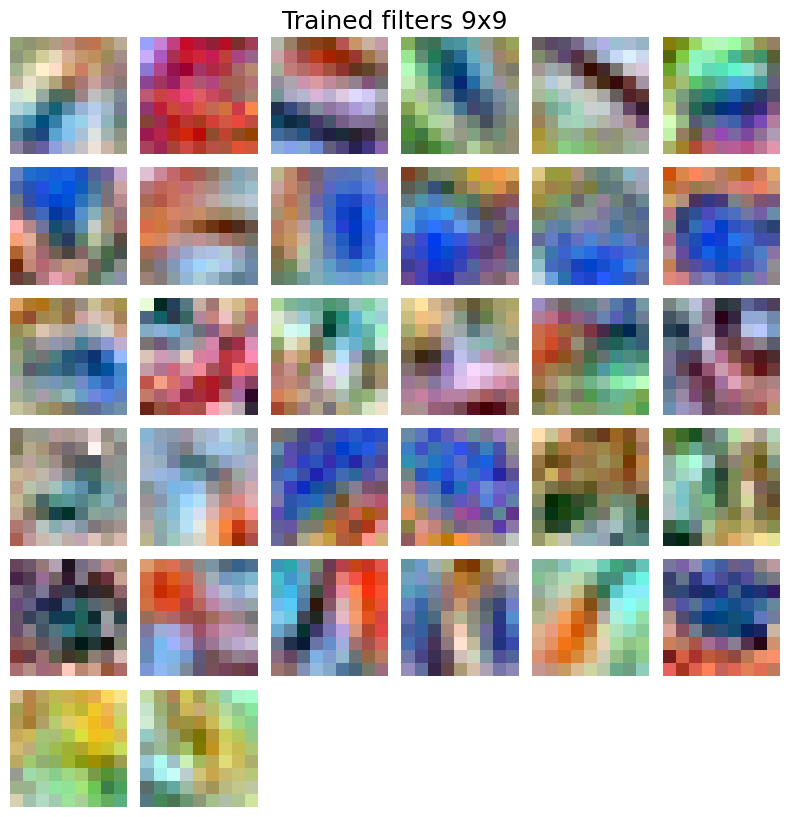

(13, 13, 3, 32)
(32, 13, 13, 3)


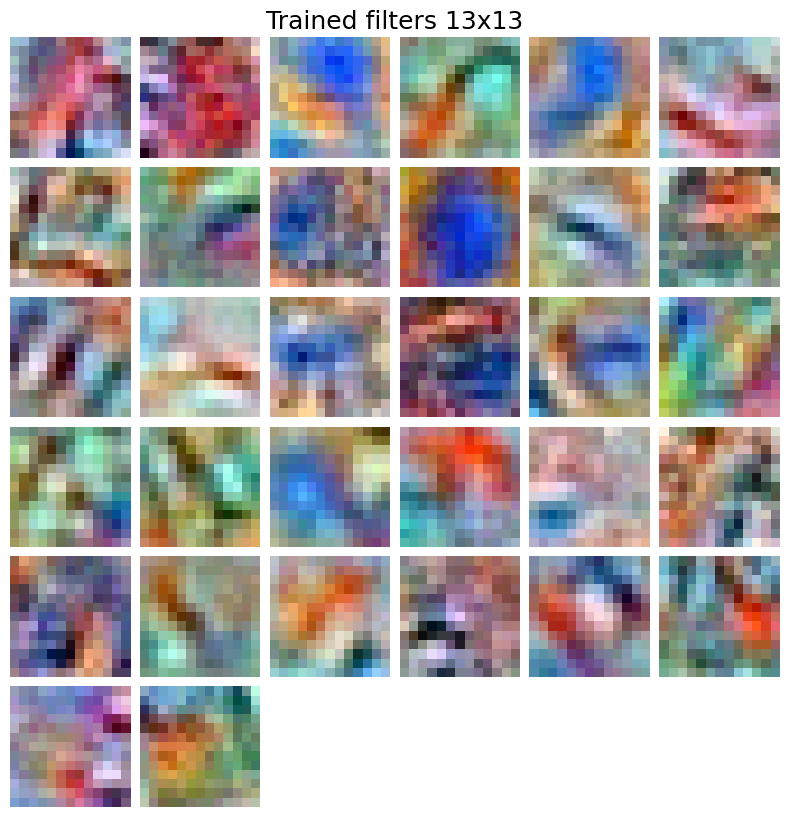

(15, 15, 3, 32)
(32, 15, 15, 3)


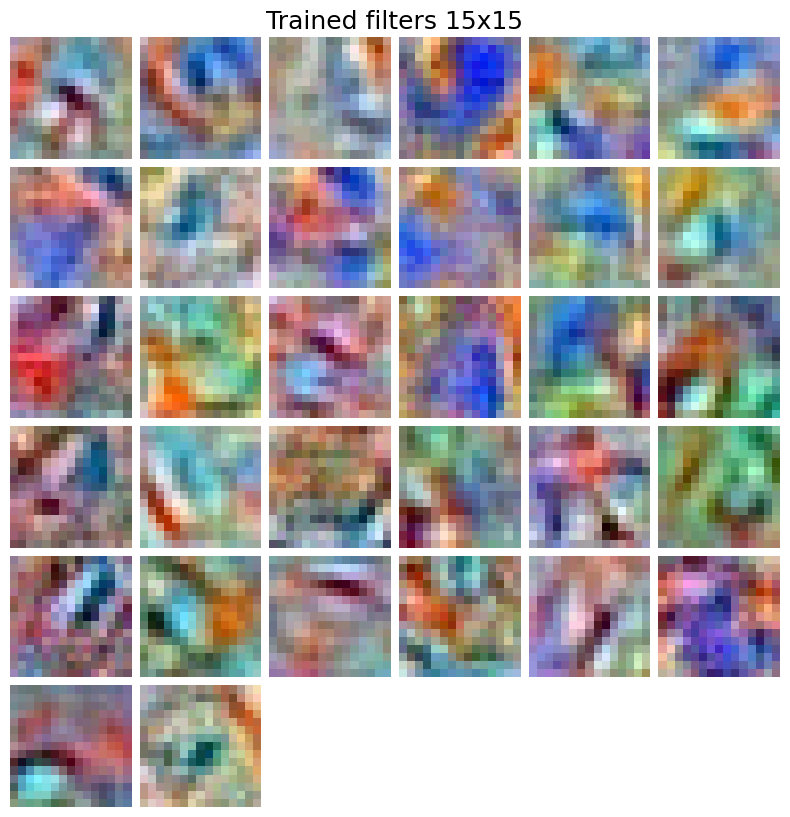

(19, 19, 3, 32)
(32, 19, 19, 3)


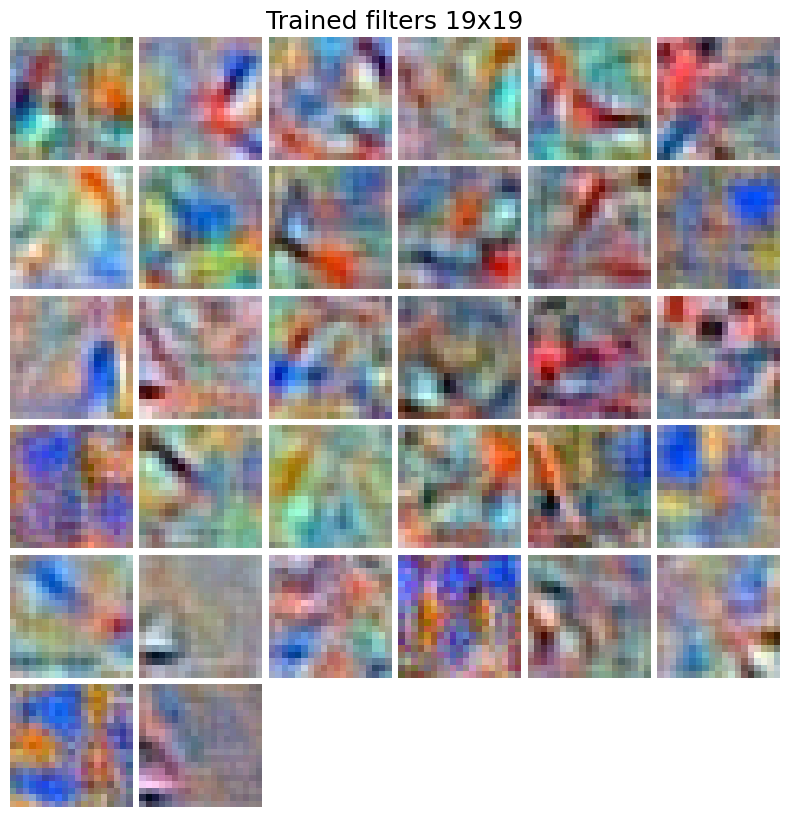

(23, 23, 3, 32)
(32, 23, 23, 3)


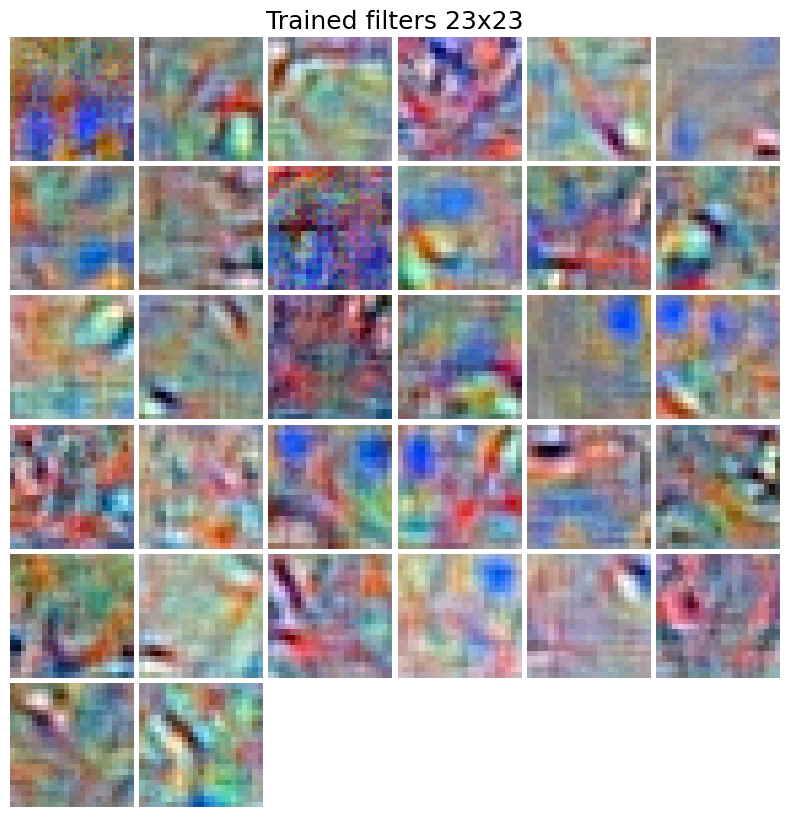

(25, 25, 3, 32)
(32, 25, 25, 3)


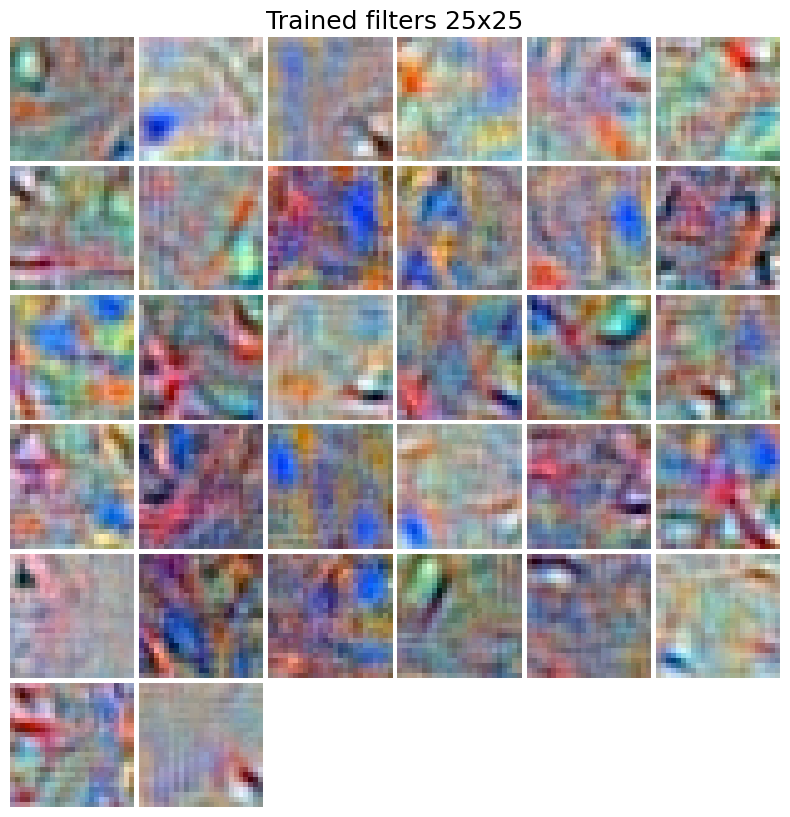

(31, 31, 3, 32)
(32, 31, 31, 3)


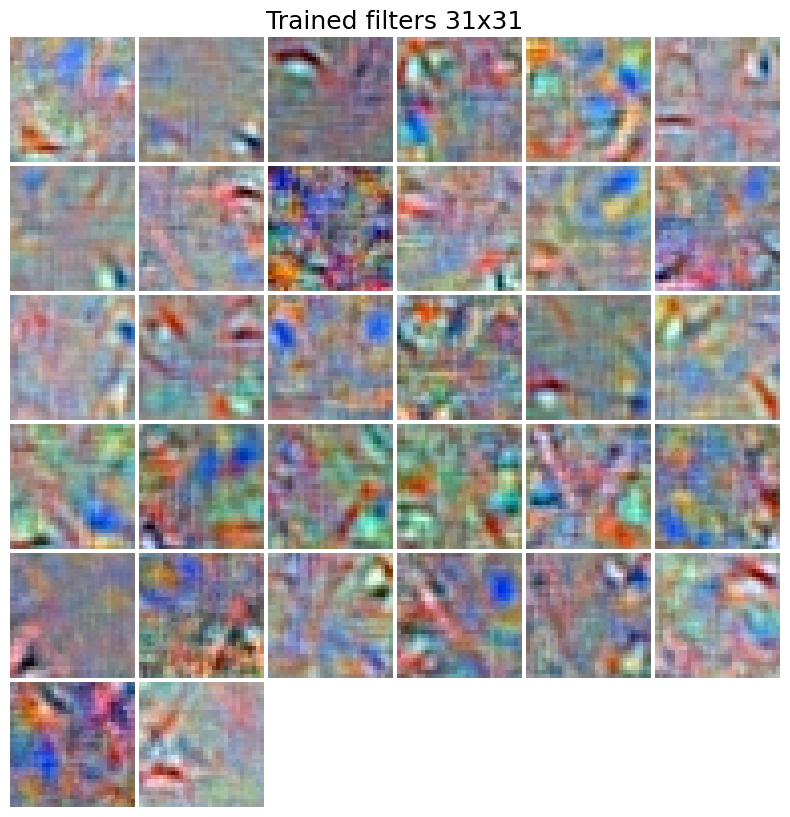

In [24]:
for i in range(len(model)):
    w = model[i].get_weights()
    print(w[0].shape)
   

   
    temp = w[0].transpose(3, 0, 1, 2)
    print(temp.shape) 

   
    fig = plt.figure()
    grid = convert_to_grid(temp)
    plt.imshow(grid.astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    name = 'Trained filters ' + str(filters[i]) + 'x' + str(filters[i])
    plt.title(name, fontsize=18)
    
  
    plt.show()

  
    name = 'filters-' + str(filters[i]) + 'x' + str(filters[i]) + '.png'
    fig.savefig(name)
    plt.close()

# New Section

(1, 32, 32, 3)
[3]


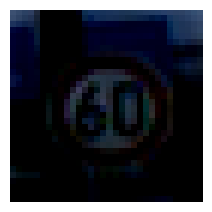

1/1 [==============================] - 0s 45ms/step
(43,)
ClassId: 3
Label: Speed limit (60km/h)


In [26]:
%matplotlib inline


x_input = data['x_test'][100:101]
print(x_input.shape)
y_input = data['y_test'][100:101]
print(y_input)

plt.rcParams['figure.figsize'] = (2.5, 2.5) 
plt.imshow(x_input[0, :, :, :])
plt.axis('off')


plt.show()


scores = model[0].predict(x_input)
print(scores[0].shape) 


prediction = np.argmax(scores)
print('ClassId:', prediction)


def label_text(file):
    
    label_list = []
    
  
    r = pd.read_csv(file)
    # Going through all names
    for name in r['SignName']:
        
        label_list.append(name)
    
   
    return label_list



labels = label_text('../content/input/label_names.csv')


print('Label:', labels[prediction])

In [27]:
for i in range(len(model)):
    name = 'model-' + str(filters[i]) + 'x' + str(filters[i]) + '.h5'
    model[i].save(name)

